In [1]:
# import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
import numpy as np

# Data Exploration and Cleanup

In [2]:
# read in csv
spotify_df = pd.read_csv("../spotify_dataset.csv")

# display into dataframe
spotify_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
# create artist specific dataframe
doja_cat_df = spotify_df[spotify_df ["Artist"] == "Doja Cat"].copy()
doja_cat_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
19,20,20,7,2021-07-23--2021-07-30,Need To Know,"16,908,917",Doja Cat,8640063,3Vi5XqYrmQgOYBajMWSvCi,"['dance pop', 'pop']",...,0.664,0.609,-6.509,0.0707,0.304,0.0926,130.041,210560,0.194,C#/Db
21,22,22,5,2021-07-23--2021-07-30,Ain't Shit,"16,126,897",Doja Cat,8640063,5lAnYvAIkSDNXqfo7DyFUm,"['dance pop', 'pop']",...,0.855,0.488,-4.601,0.208,0.506,0.347,124.097,174253,0.619,D#/Eb
96,97,97,3,2021-07-23--2021-07-30,Woman,"6,858,466",Doja Cat,8640063,6Uj1ctrBOjOas8xZXGqKk4,"['dance pop', 'pop']",...,0.824,0.764,-4.175,0.0854,0.0888,0.117,107.998,172627,0.881,F
113,114,9,29,2021-02-05--2021-02-12,Streets,"6,502,302",Doja Cat,8640063,60ynsPSSKe6O3sfwRnIBRf,"['dance pop', 'pop']",...,0.749,0.463,-8.433,0.0842,0.21,0.338,90.035,226987,0.189,B


In [4]:
ed_sheeran_df = spotify_df[spotify_df ["Artist"] == "Ed Sheeran"].copy()
the_weeknd_df = spotify_df[spotify_df ["Artist"] == "The Weeknd"].copy()
drake_df = spotify_df[spotify_df ["Artist"] == "Drake"].copy()

In [5]:
# display how many followers artist has using max function
doja_followers = doja_cat_df['Artist Followers'].max()
print(doja_followers)

8671649


In [6]:
ed_sheeran_followers = ed_sheeran_df['Artist Followers'].max()
the_weeknd_followers = the_weeknd_df['Artist Followers'].max()
drake_followers = drake_df['Artist Followers'].max()

In [7]:
# display how many songs artist has in top 200
doja_song_count = doja_cat_df["Song ID"].count()
print(doja_song_count)

16


In [8]:
ed_sheeran_song_count = ed_sheeran_df["Song ID"].count()
the_weeknd_song_count = the_weeknd_df["Song ID"].count()
drake_song_count = drake_df["Song ID"].count()

In [9]:
# display how many times the artist has had a song in the top 200 (aggregate all songs 'number of times charted')
doja_times_charted = doja_cat_df["Number of Times Charted"].sum()
print(doja_times_charted)

185


In [30]:
ed_sheeran_times_charted = ed_sheeran_df["Number of Times Charted"].sum()
the_weeknd_times_charted = the_weeknd_df["Number of Times Charted"].sum()
drake_times_charted = drake_df["Number of Times Charted"].sum()

In [11]:
# display whether or not artist has had a #1 charting song
if len(doja_cat_df.loc[doja_cat_df["Highest Charting Position"] == 1]) > 0:
    print("Doja Cat has topped the chart")
else:
    print("Doja Cat has not topped the chart")

Doja Cat has not topped the chart


In [12]:
# convert 'Streams' column from strings into integers
doja_cat_df["Streams"] = doja_cat_df["Streams"].str.replace(",","").astype(int)

In [13]:
ed_sheeran_df["Streams"] = ed_sheeran_df["Streams"].str.replace(",","").astype(int)
the_weeknd_df["Streams"] = the_weeknd_df["Streams"].str.replace(",","").astype(int)
drake_df["Streams"] = drake_df["Streams"].str.replace(",","").astype(int)

In [14]:
# create df for artist song name and streams
doja_cat_streams_df = doja_cat_df[["Song Name", "Streams"]].copy()
doja_cat_streams_df.sort_values(by=["Streams"], ascending=False)

,Song Name,Streams
6,Kiss Me More (feat. SZA),29356736
19,Need To Know,16908917
21,Ain't Shit,16126897
96,Woman,6858466
264,Get Into It (Yuh),6503281
113,Streets,6502302
238,I Don't Do Drugs (feat. Ariana Grande),5912293
1545,Candy,5632102
267,Naked,5527865
269,Payday (feat. Young Thug),5393789


In [15]:
ed_sheeran_streams_df = ed_sheeran_df[["Song Name", "Streams"]].copy()
the_weeknd_streams_df = the_weeknd_df[["Song Name", "Streams"]].copy()
drake_streams_df = drake_df[["Song Name", "Streams"]].copy()

In [16]:
# aggregate total streams for artist
doja_cat_total_streams = doja_cat_streams_df["Streams"].sum()
doja_cat_total_streams

133496415

In [17]:
ed_sheeran_total_streams = ed_sheeran_streams_df["Streams"].sum()
the_weeknd_total_streams = the_weeknd_streams_df["Streams"].sum()
drake_total_streams = drake_streams_df["Streams"].sum()

# Data Analysis and Visualization Process

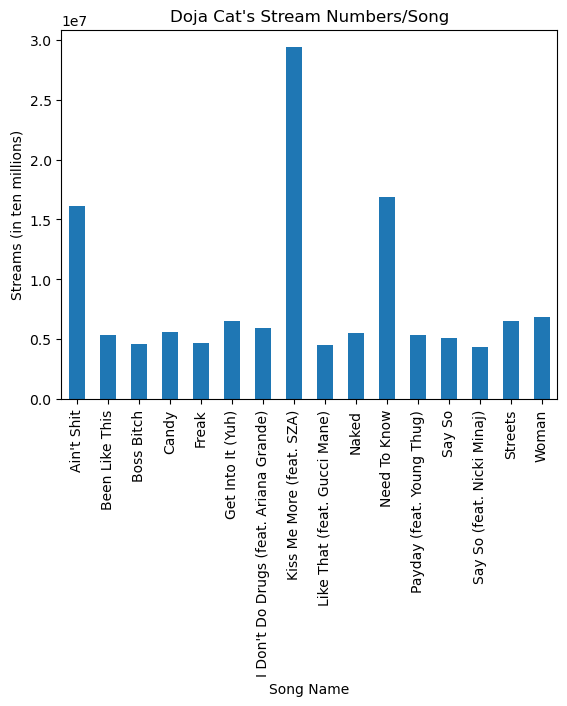

In [18]:
# create bar graph showing number of streams and song title
doja_bar_graph = doja_cat_streams_df.groupby('Song Name')['Streams'].sum()
doja_bar_graph.plot(kind="bar", x="Song Name", y="Streams")

plt.title("Doja Cat's Stream Numbers/Song")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)

plt.savefig("doja_cat_bargraph.png")

plt.show()

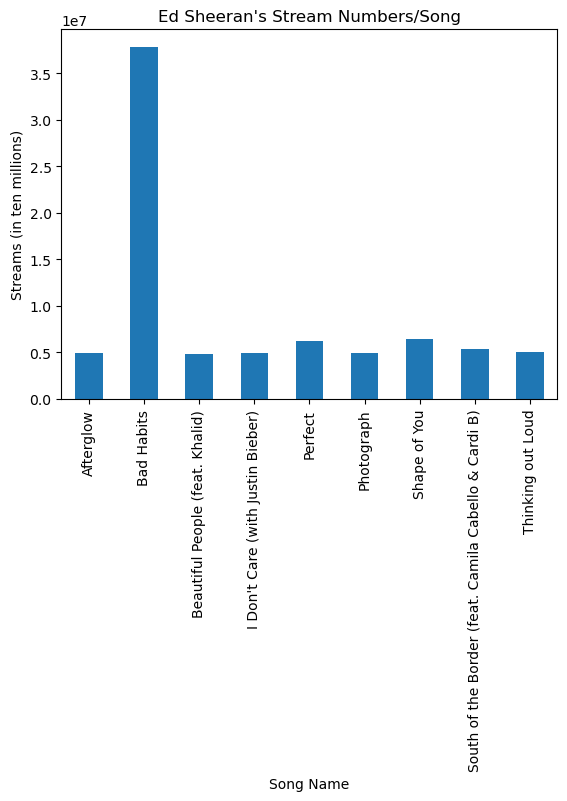

In [19]:
ed_bar_graph = ed_sheeran_streams_df.groupby('Song Name')['Streams'].sum()
ed_bar_graph.plot(kind="bar", x="Song Name", y="Streams")

plt.title("Ed Sheeran's Stream Numbers/Song")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)

#plt.savefig("ed_sheeran_bargraph.png")

plt.show()

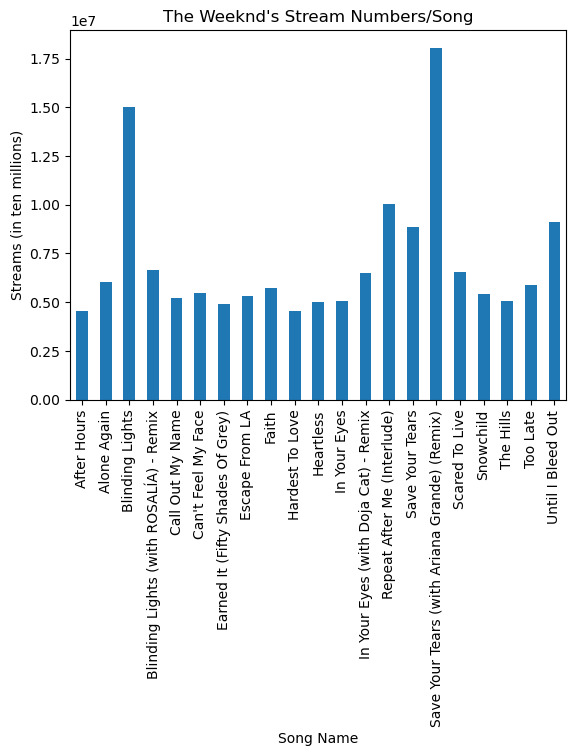

In [20]:
weeknd_bar_graph = the_weeknd_streams_df.groupby('Song Name')['Streams'].sum()
weeknd_bar_graph.plot(kind="bar", x="Song Name", y="Streams")

plt.title("The Weeknd's Stream Numbers/Song")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)

#plt.savefig("the_weeknd_bargraph.png")

plt.show()

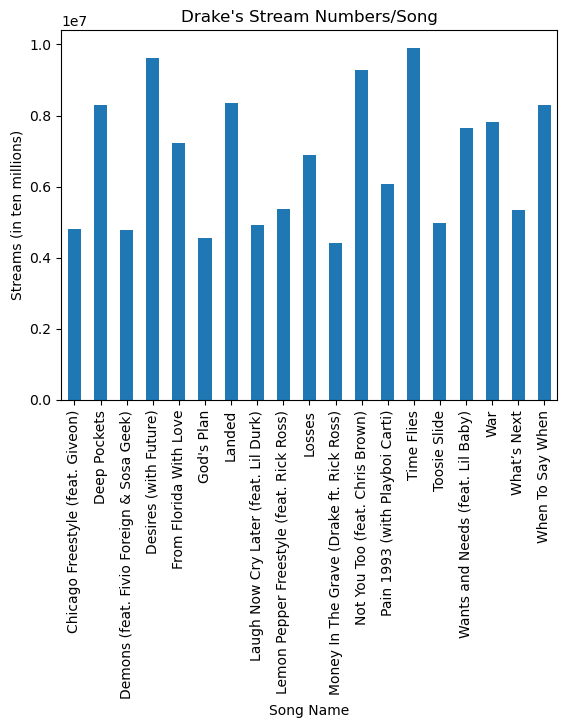

In [21]:
drake_bar_graph = drake_streams_df.groupby('Song Name')['Streams'].sum()
drake_bar_graph.plot(kind="bar", x="Song Name", y="Streams")

plt.title("Drake's Stream Numbers/Song")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)

#plt.savefig("drake_bargraph.png")

plt.show()

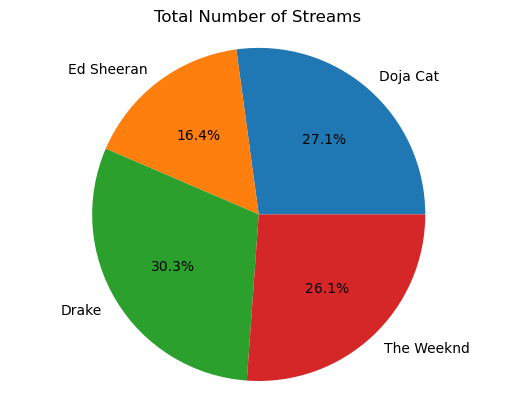

In [22]:
# create pie chart to compare total number of streams across artists
artists = ["Doja Cat", "Ed Sheeran", "Drake", "The Weeknd",] 
streams = [doja_cat_total_streams, ed_sheeran_total_streams, the_weeknd_total_streams, drake_total_streams]
labels=artists
plt.pie(streams, labels=artists, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Total Number of Streams")
#plt.savefig("totalstreams_piechart.png")
plt.show()

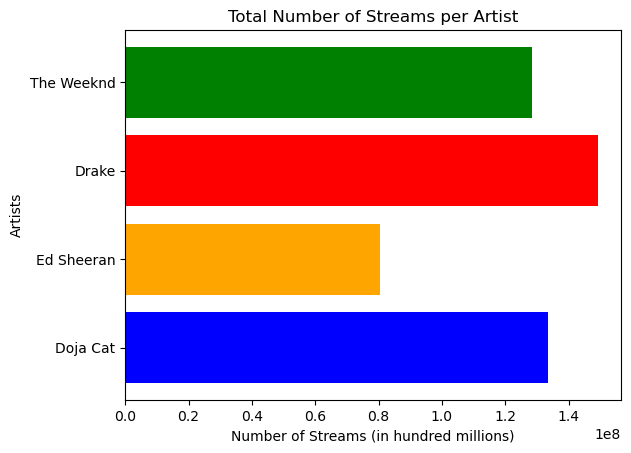

In [23]:
# create bar graph to compare total number of streams across artists
plt.barh(artists, streams, color=("Blue", "Orange", "Red", "Green"))
plt.title("Total Number of Streams per Artist")
plt.ylabel("Artists")
plt.xlabel("Number of Streams (in hundred millions)")
#plt.savefig("totalstreams_horizbarchart.png")
plt.show()

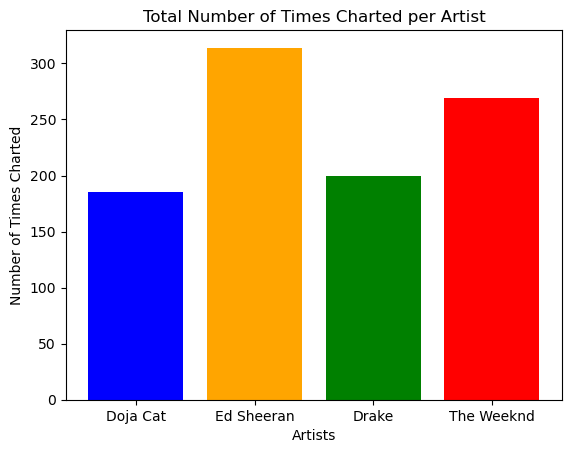

In [31]:
# create bar graph to compare total number of times charted per artists
totaltimes_charted_byartist = [doja_times_charted, ed_sheeran_times_charted, drake_times_charted, the_weeknd_times_charted]
plt.bar(artists, totaltimes_charted_byartist, color=("Blue", "Orange", "Green", "Red"))
plt.title("Total Number of Times Charted per Artist")
plt.xlabel("Artists")
plt.ylabel("Number of Times Charted")

plt.savefig("totaltimes_charted_byartist.png")

plt.show()


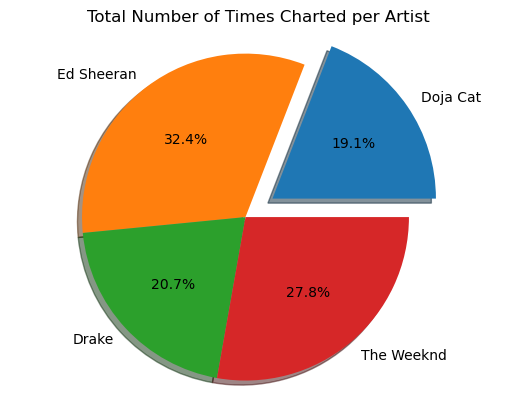

In [32]:
# create pie chart to compare total number of times charted per artist
artists = ["Doja Cat", "Ed Sheeran", "Drake", "The Weeknd",] 
streams = [doja_times_charted, ed_sheeran_times_charted, drake_times_charted, the_weeknd_times_charted]
labels=artists
myexplode = [0.2, 0, 0, 0]
plt.show() 
plt.pie(streams, labels=artists, autopct="%1.1f%%", explode = myexplode, shadow=True)
plt.axis("equal")
plt.title("Total Number of Times Charted per Artist")
plt.savefig("totaltimes_charted_piechart.png")
plt.show()

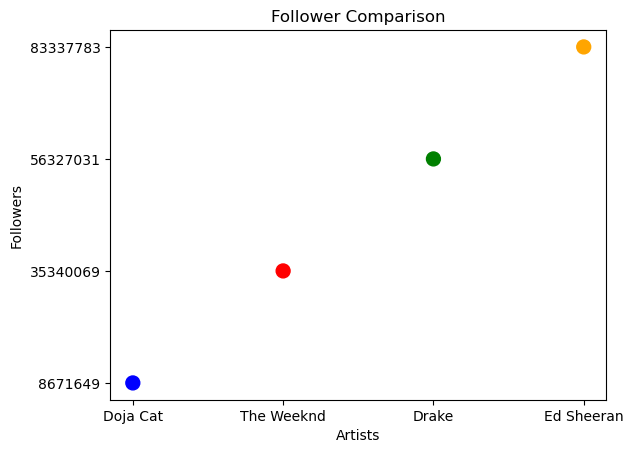

In [26]:
# create scatter plot to show artist follower count
data={'Artists':['Doja Cat', 'The Weeknd', 'Drake', 'Ed Sheeran'],
      'Followers':[doja_followers, the_weeknd_followers, drake_followers, ed_sheeran_followers, ]}
followers_df = pd.DataFrame(data = data);
followers_df.plot.scatter(x = 'Artists', y = 'Followers', s = 100, c=("Blue", "Red", "Green", "Orange"));
plt.title("Follower Comparison")
plt.savefig("maxfollowerschart.png")
plt.show()